In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
# import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import glob as glob
# import arrow


/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### rcdefaults to set grid to all graphs

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

### Retrieving Data

In [3]:
dengues = glob.glob("temp/*.csv")
dengues = dengues[:-2]

In [4]:
list_ = []
for file_ in dengues:
    df = pd.read_csv(file_)
    list_.append(df)
    allDengue = np.concatenate(list_)

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity

In [5]:
len(allDengue) 

869235

### changing ways to take in csv files [temp work] 22/11/16

In [6]:
# df = pd.concat((pd.read_csv(f,index_col=0) for f in dengues))
# df.index.name=None
# df.reset_index(inplace=True)

In [7]:
# df.head()

In [8]:
# 0โรค    1เพศ    2อายุปี    3อายุเดือน    4อายุวัน    5สถานะสมรส    
# 6เชื้อชาติ    7ประเภทต่างชาติ    8อาชีพ    9ที่อยู่    10เขตเทศบาล    
# 11ประเภทสถานที่รักษา    12ชนิดผู้ป่วย    13ผลการรักษา    14รหัสสถานที่รักษา    
# 15วันเริ่มป่วย    16วันที่มารพ    17วันพบผู้ป่วย    18วันที่เสียชีวิต    
# 19เชื้อ    20โรคแทรกซ้อน

### end of temp work

In [9]:
temperature = glob.glob("met18000/yr2001-2012/*.xls")
temperature

['met18000/yr2001-2012/daily-1.xls',
 'met18000/yr2001-2012/daily-2.xls',
 'met18000/yr2001-2012/daily-3.xls',
 'met18000/yr2001-2012/daily-4.xls',
 'met18000/yr2001-2012/daily-5.xls']

In [10]:
list_ = []
for file_ in temperature:
    df = pd.read_excel(file_)
    list_.append(df)
    allTemps = np.concatenate(list_)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


### Turn into readable format

In [11]:
allDengue_copy = allDengue.copy()
allDengue_copy[:,9] = allDengue_copy[:,9].astype('str')

### Functions to clean data

In [12]:
def seperate(data,distinct):
    tmp = []
    for distinct_province in distinct:
        sub_tmp = []
        for data_province in data:
            if data_province[9][:2] == distinct_province:
                sub_tmp.append(data_province)
        sub_tmp = np.array(sub_tmp)
        tmp.append(sub_tmp)
    return np.array(tmp)

def plotByDate(allDates,title):
    df = pd.DataFrame(allDates,columns=['date'])
    df.groupby([df.date.dt.year,df.date.dt.week]).count().plot(kind="bar",figsize=(120,8))
    plt.grid(True);
    plt.title(title)
    plt.xlabel("Weeks")
    plt.ylabel("Cases")
#     plt.savefig(title+".png",dpi = 150)

def cleanDate(raw_dates):
    toRemove = []
    for i,elt in enumerate(raw_dates):
        if elt == '0000-00-00' or type(elt) == float:
            print "to be removed", i, elt
            toRemove.append(i)

    raw_dates = np.delete(raw_dates, toRemove, axis=0)
    return raw_dates

In [13]:
# seperate the by province

unique_province = allDengue_copy[:len(allTemps),9]
# seperate by changwat 10 is bangkok
unique_province = np.array([i[:2] for i in unique_province]) 
unique_province = np.unique(unique_province)
# unique_province

In [14]:
allProvinces = seperate(allDengue_copy,unique_province)

In [15]:
dates = allProvinces[0][:][:,15] # by province

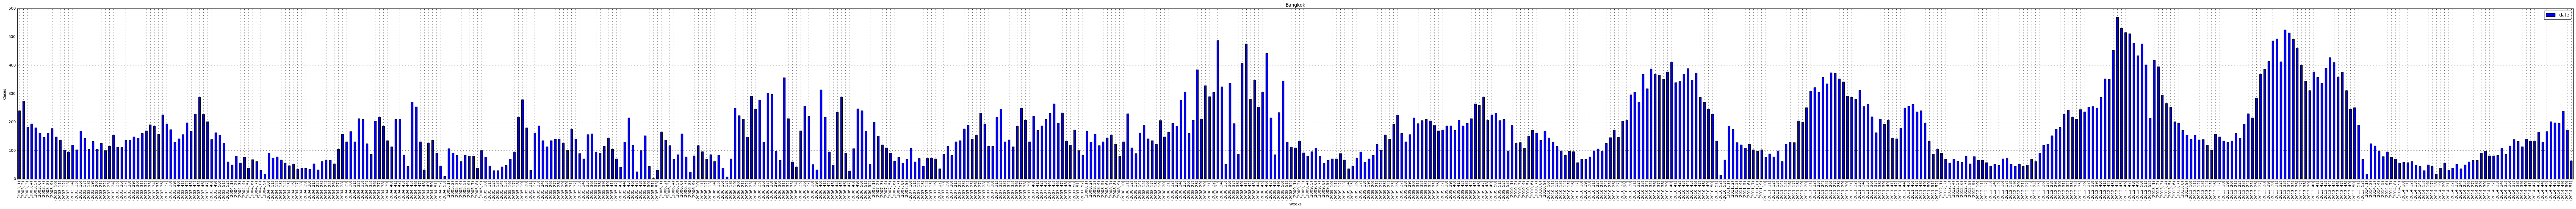

In [16]:
BKKdates = allProvinces[0][:][:,15]
BKKdatesMth = cleanDate(dates).astype("datetime64")
plotByDate(BKKdatesMth,"Bangkok")

In [17]:
BKKdates = allProvinces[0][:][:,15]
BKKdatesMth = cleanDate(dates).astype("datetime64")

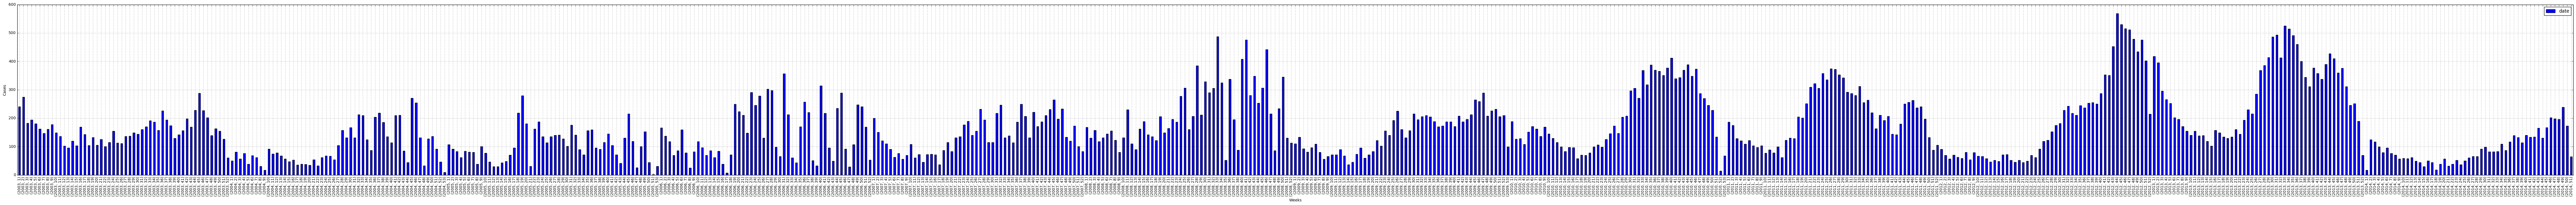

In [18]:
df = pd.DataFrame(BKKdatesMth,columns=['date'])
allWeeks = df.groupby([df.date.dt.year,df.date.dt.week]).count()

df.groupby([df.date.dt.year,df.date.dt.week]).count().plot(kind="bar",figsize=(120,8))
# plt.grid(True);
# plt.title(title)
plt.xlabel("Weeks")
plt.ylabel("Cases")

In [19]:
newSer = pd.Series(df)
newSer0 = newSer.groupby([df.date.dt.year,df.date.dt.week]).count()

In [20]:
denguesByWeekBKK = np.array([i for i in newSer0])
BKKdf = pd.DataFrame(denguesByWeekBKK,columns=['freq'])

###  seasonal_decompose takes in Time series 

In [21]:
# create index to be the date starting from 2003-01-06
# add this onto the freq

start = datetime.datetime.strptime("2003-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(weeks=x) for x in range(0,625)]


In [22]:
BKKdf['date'] = pd.Series(date_list, index=BKKdf.index)

In [23]:
BKKdf = BKKdf[['date','freq']]
BKKdf.set_index(['date'], inplace=True)
BKKdf.index.name=None

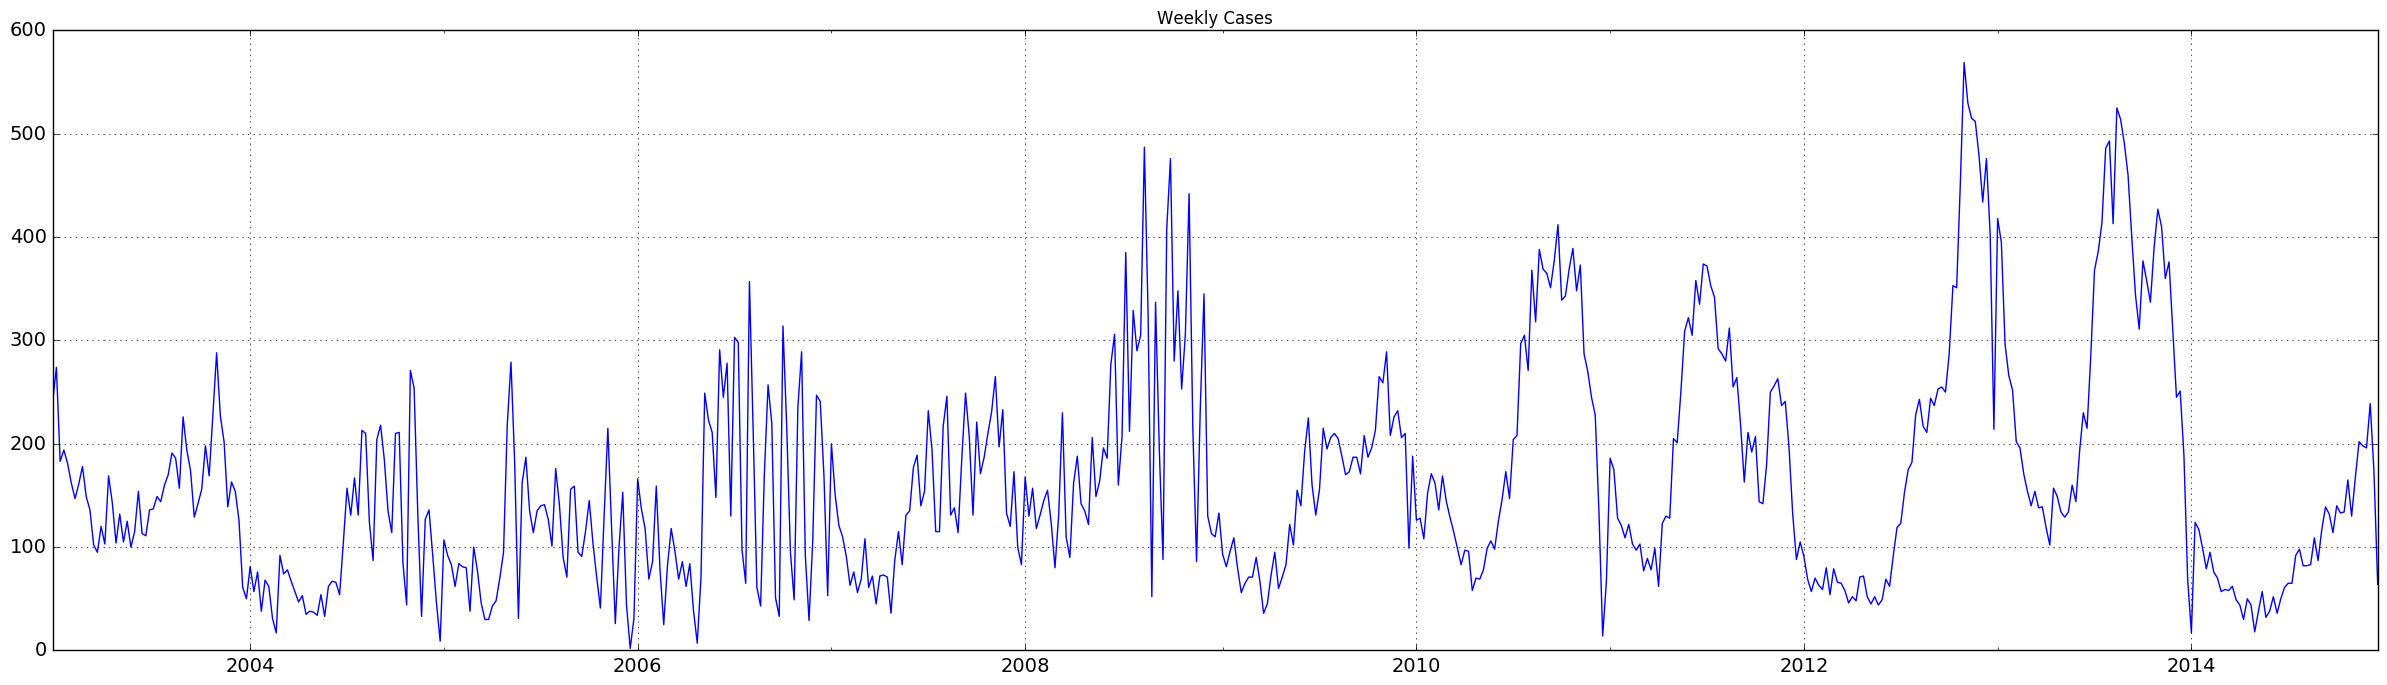

In [24]:
BKKdf.freq.plot(figsize=(30,8), title= 'Weekly Cases', fontsize=14)
# plt.savefig('month_ridership.png', bbox_inches='tight')

In [25]:
# decomposition = seasonal_decompose(BKKdf.freq, freq=52)  
# fig = plt.figure()  
# fig = decomposition.plot()  
# fig.set_size_inches(30, 8)

In [26]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(30, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


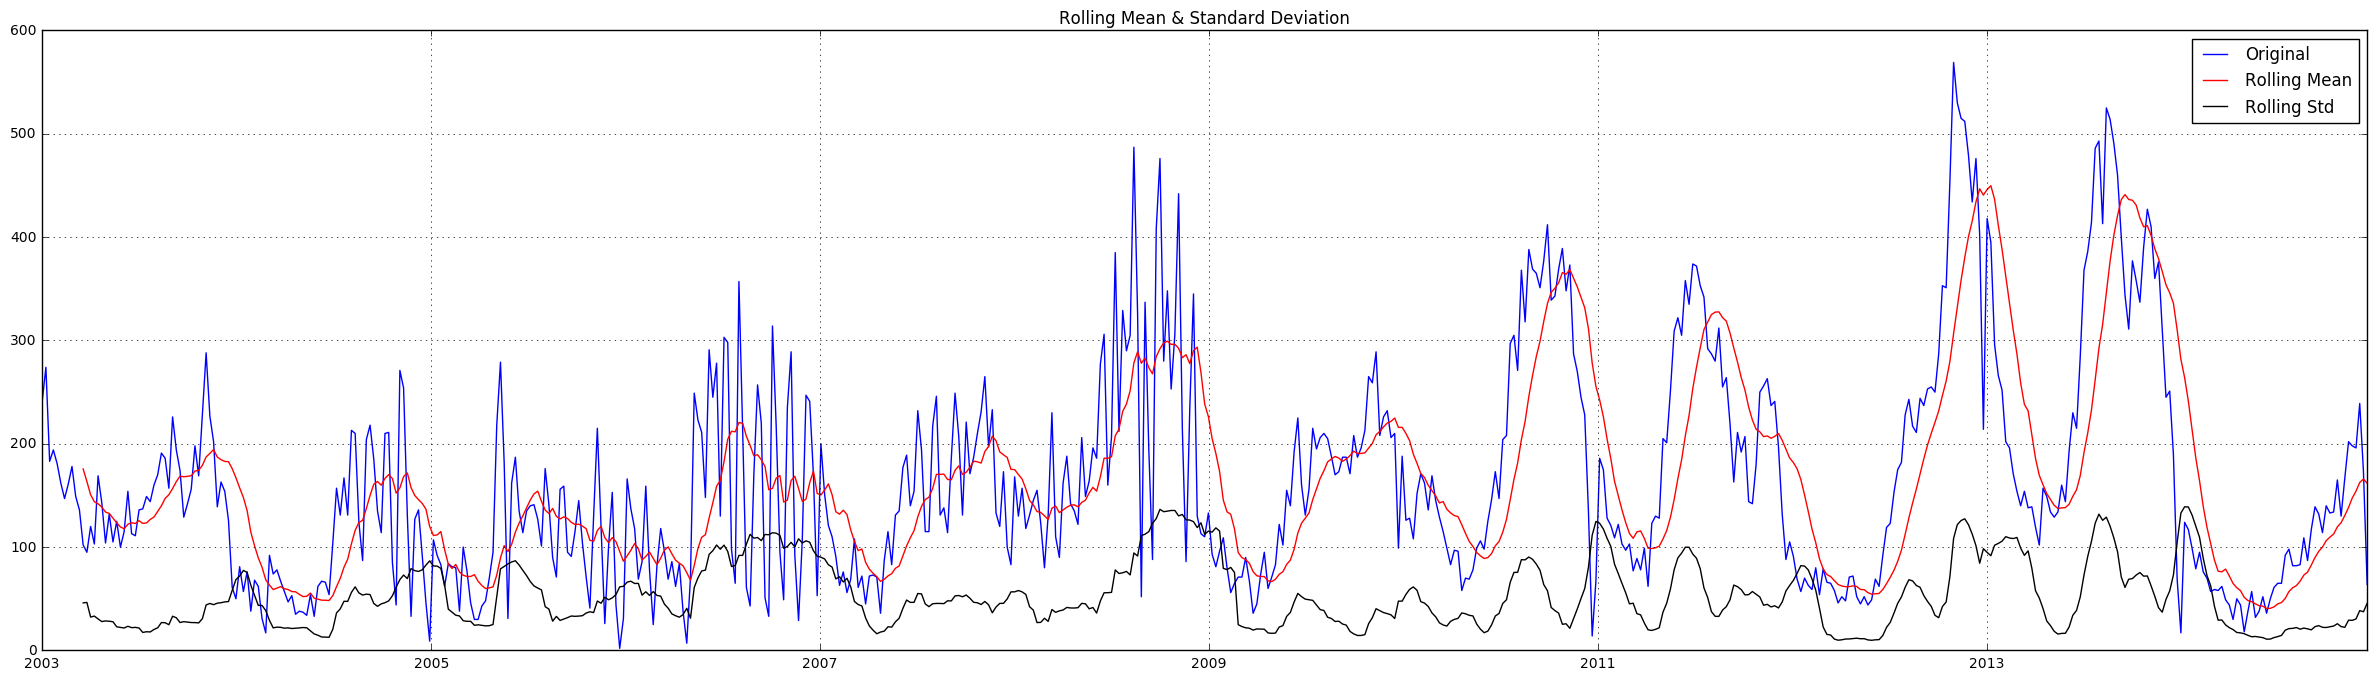

Results of Dickey-Fuller Test:
Test Statistic                  -5.530531
p-value                          0.000002
#Lags Used                      13.000000
Number of Observations Used    611.000000
Critical Value (5%)             -2.866282
Critical Value (1%)             -3.441098
Critical Value (10%)            -2.569295
dtype: float64


In [27]:
test_stationarity(BKKdf.freq)

In [28]:
# ts_log = np.log(BKKdf.freq)
# ts_log.plot(figsize=(30,8), title= 'Smooth Weekly Cases by Log', fontsize=14)

In [29]:
ts_log = BKKdf.freq

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=52,center=False).mean()
  if __name__ == '__main__':


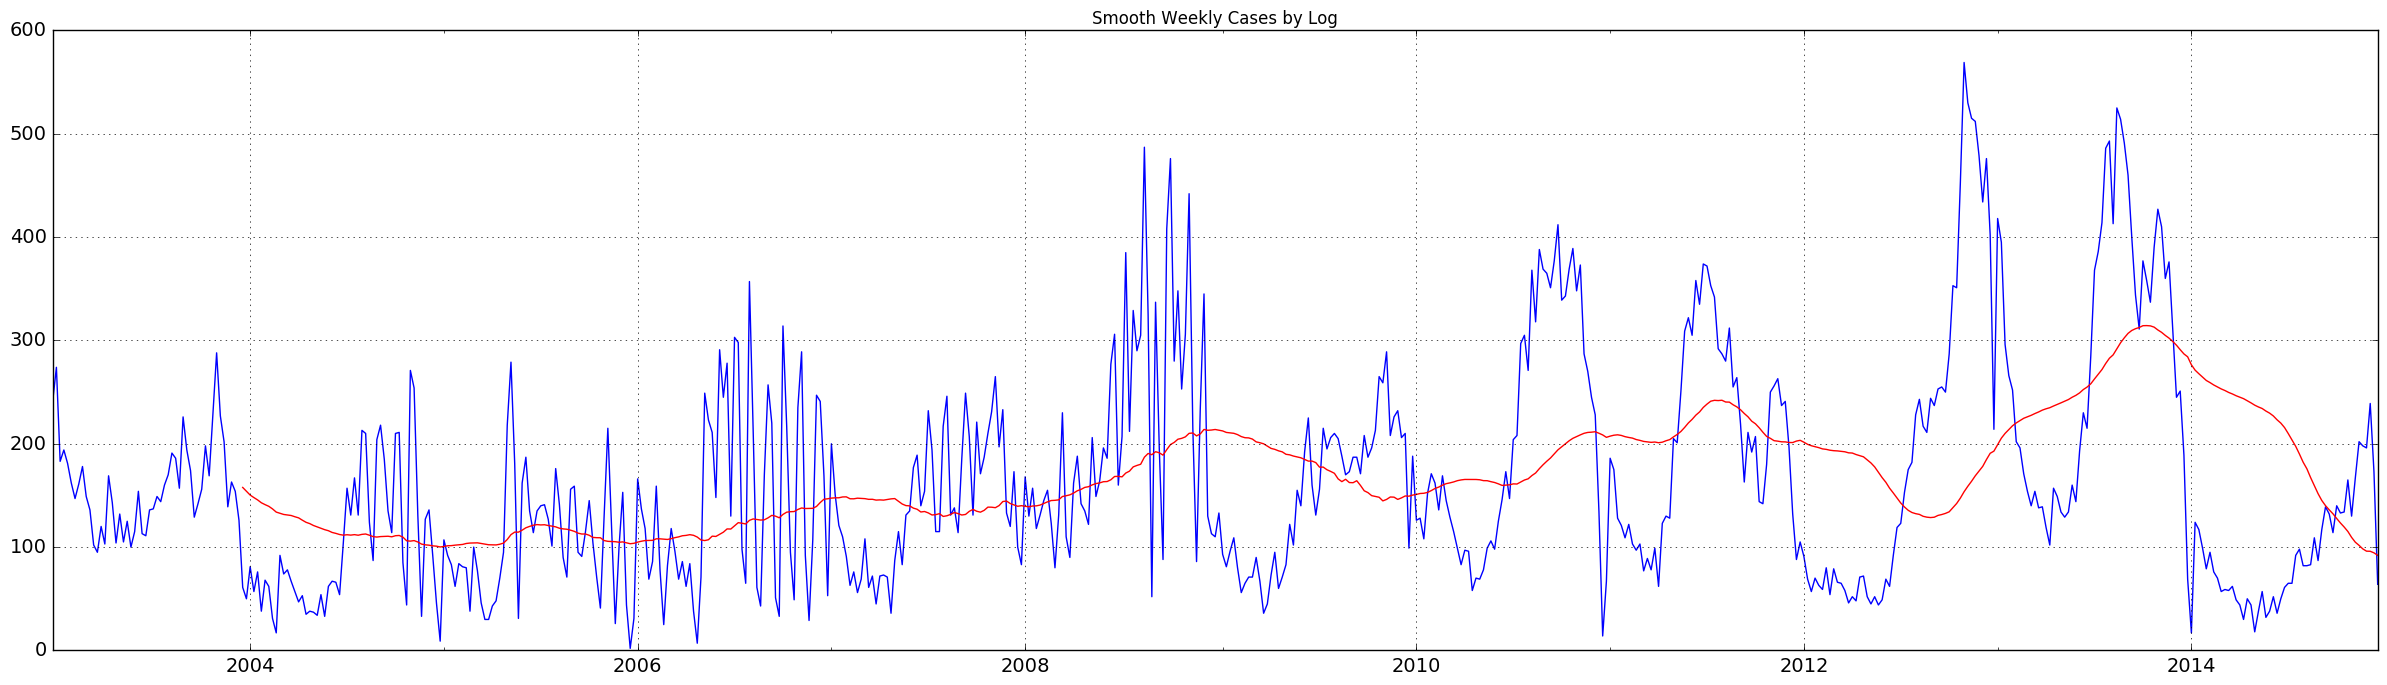

In [30]:
moving_avg = pd.rolling_mean(ts_log,52) # past 1 year, 52 weeks
BKKdf.freq.plot(figsize=(30,8), title= 'Smooth Weekly Cases by Log', fontsize=14)
moving_avg.plot(figsize=(30,8), title= 'Smooth Weekly Cases by Log', fontsize=14,color='r')

In [31]:
# remove log
# ts_log_moving_avg_diff = ts_log - moving_avg
# ts_log_moving_avg_diff.head(52)

In [32]:
ts_log_moving_avg_diff = moving_avg

### Drop Nans

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


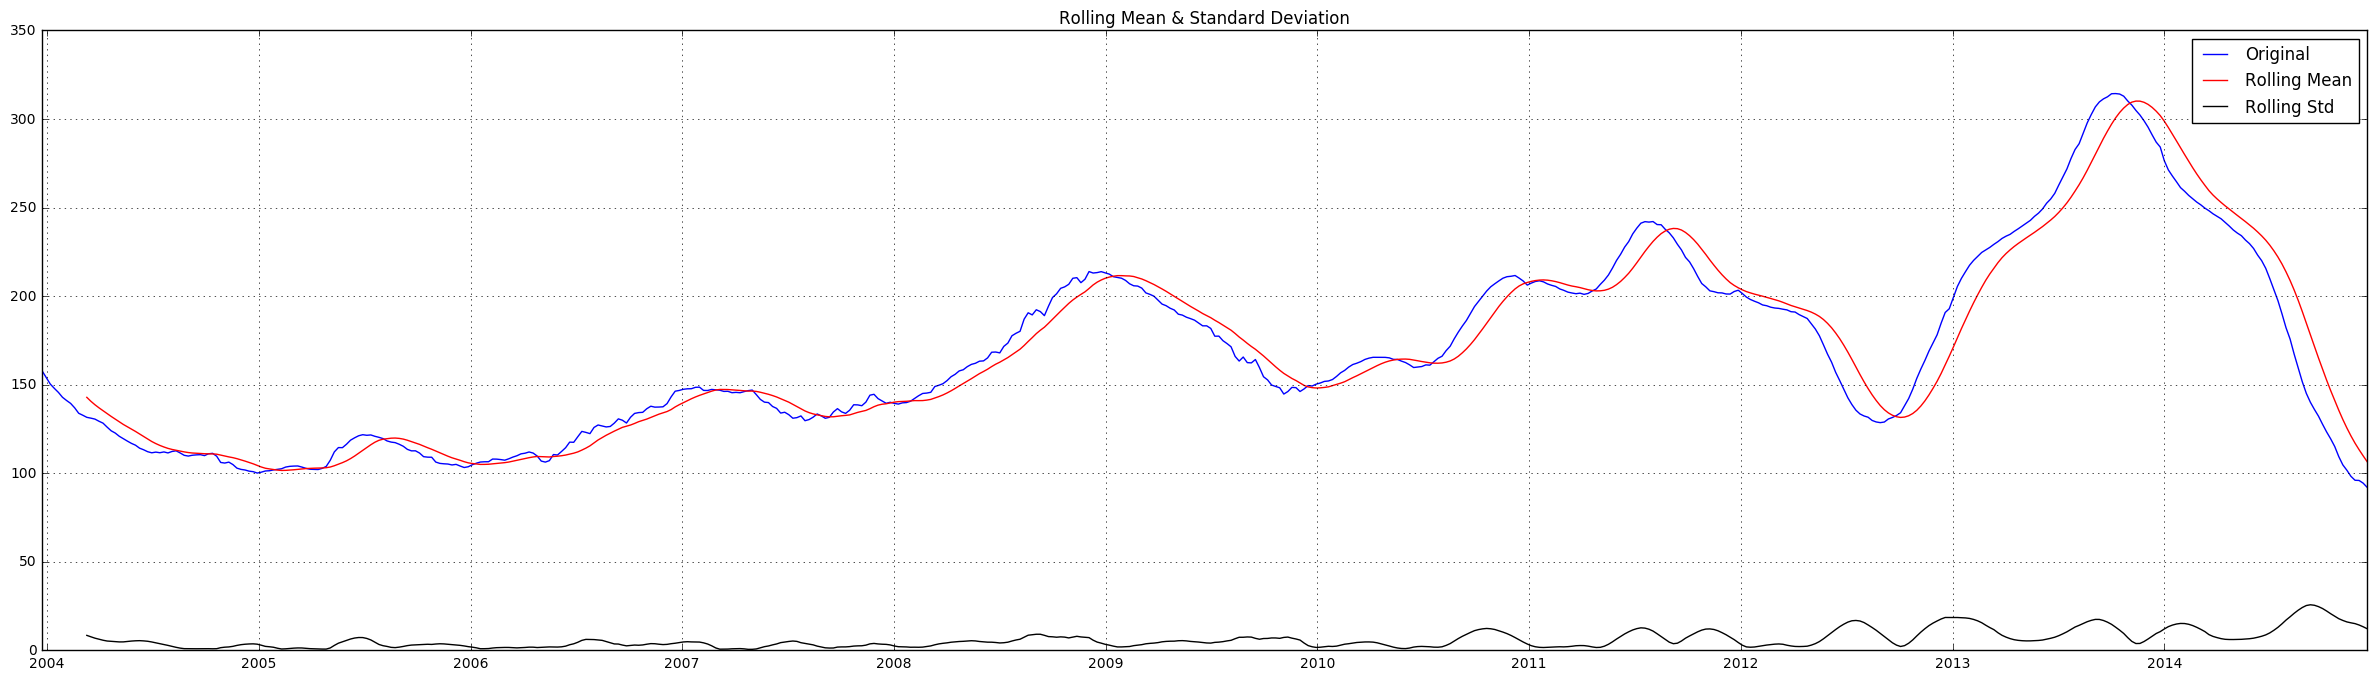

Results of Dickey-Fuller Test:
Test Statistic                  -2.316375
p-value                          0.166741
#Lags Used                      10.000000
Number of Observations Used    563.000000
Critical Value (5%)             -2.866687
Critical Value (1%)             -3.442019
Critical Value (10%)            -2.569511
dtype: float64


In [33]:
ts_log_moving_avg_diff.dropna(inplace=True) # drop nans 
test_stationarity(ts_log_moving_avg_diff)

### 95% confidence: stationary series, since test statistics < 5%

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=52,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


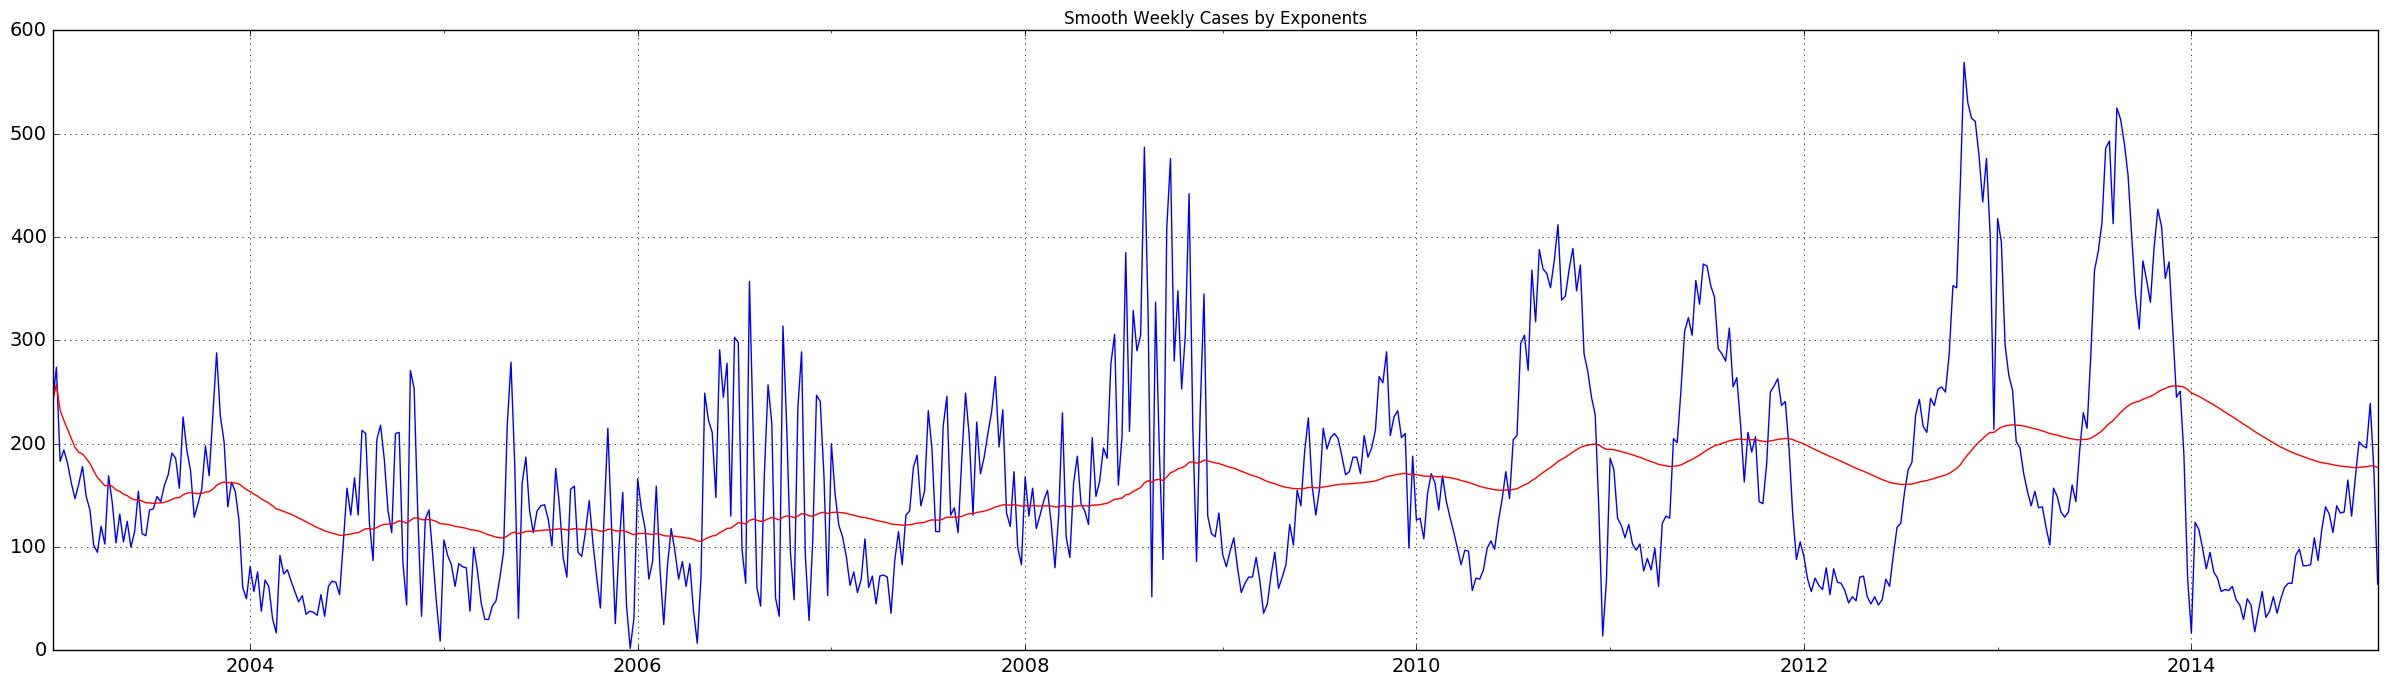

In [34]:
expwighted_avg = pd.ewma(ts_log, halflife=52)
ts_log.plot(figsize=(30,8), title= 'Smooth Weekly Cases by Exponents', fontsize=14)
expwighted_avg.plot(figsize=(30,8), title= 'Smooth Weekly Cases by Exponents', fontsize=14, color="r")

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


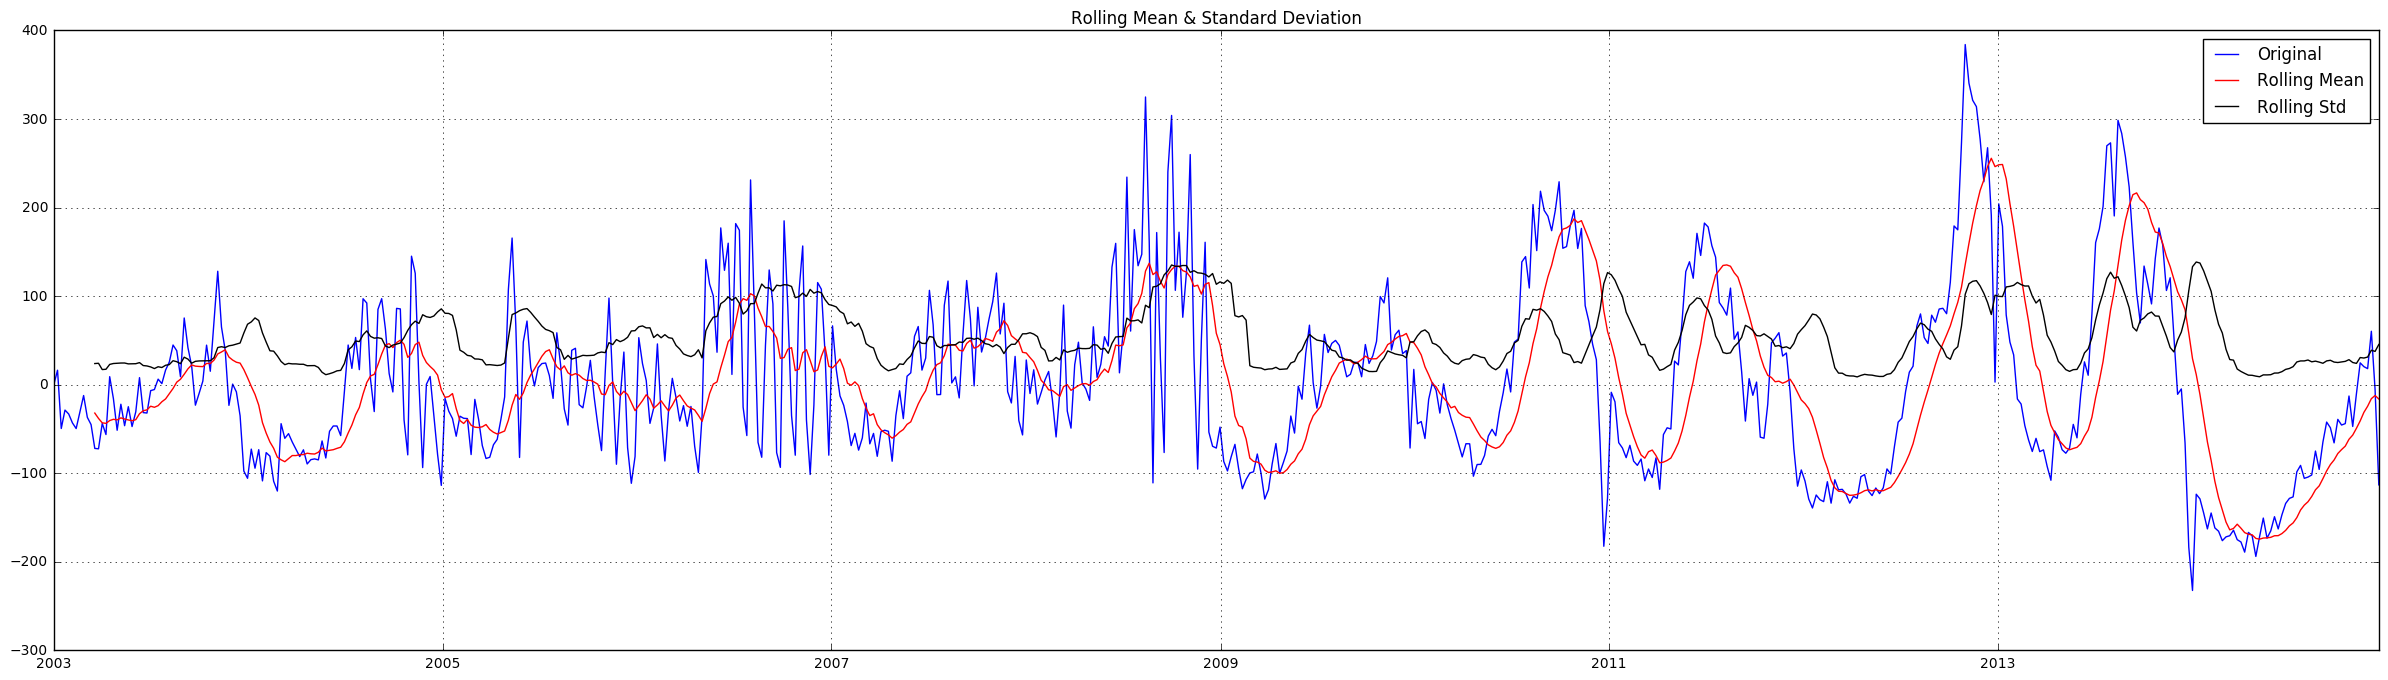

Results of Dickey-Fuller Test:
Test Statistic                -6.487942e+00
p-value                        1.247286e-08
#Lags Used                     1.700000e+01
Number of Observations Used    6.070000e+02
Critical Value (5%)           -2.866313e+00
Critical Value (1%)           -3.441169e+00
Critical Value (10%)          -2.569312e+00
dtype: float64


In [35]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

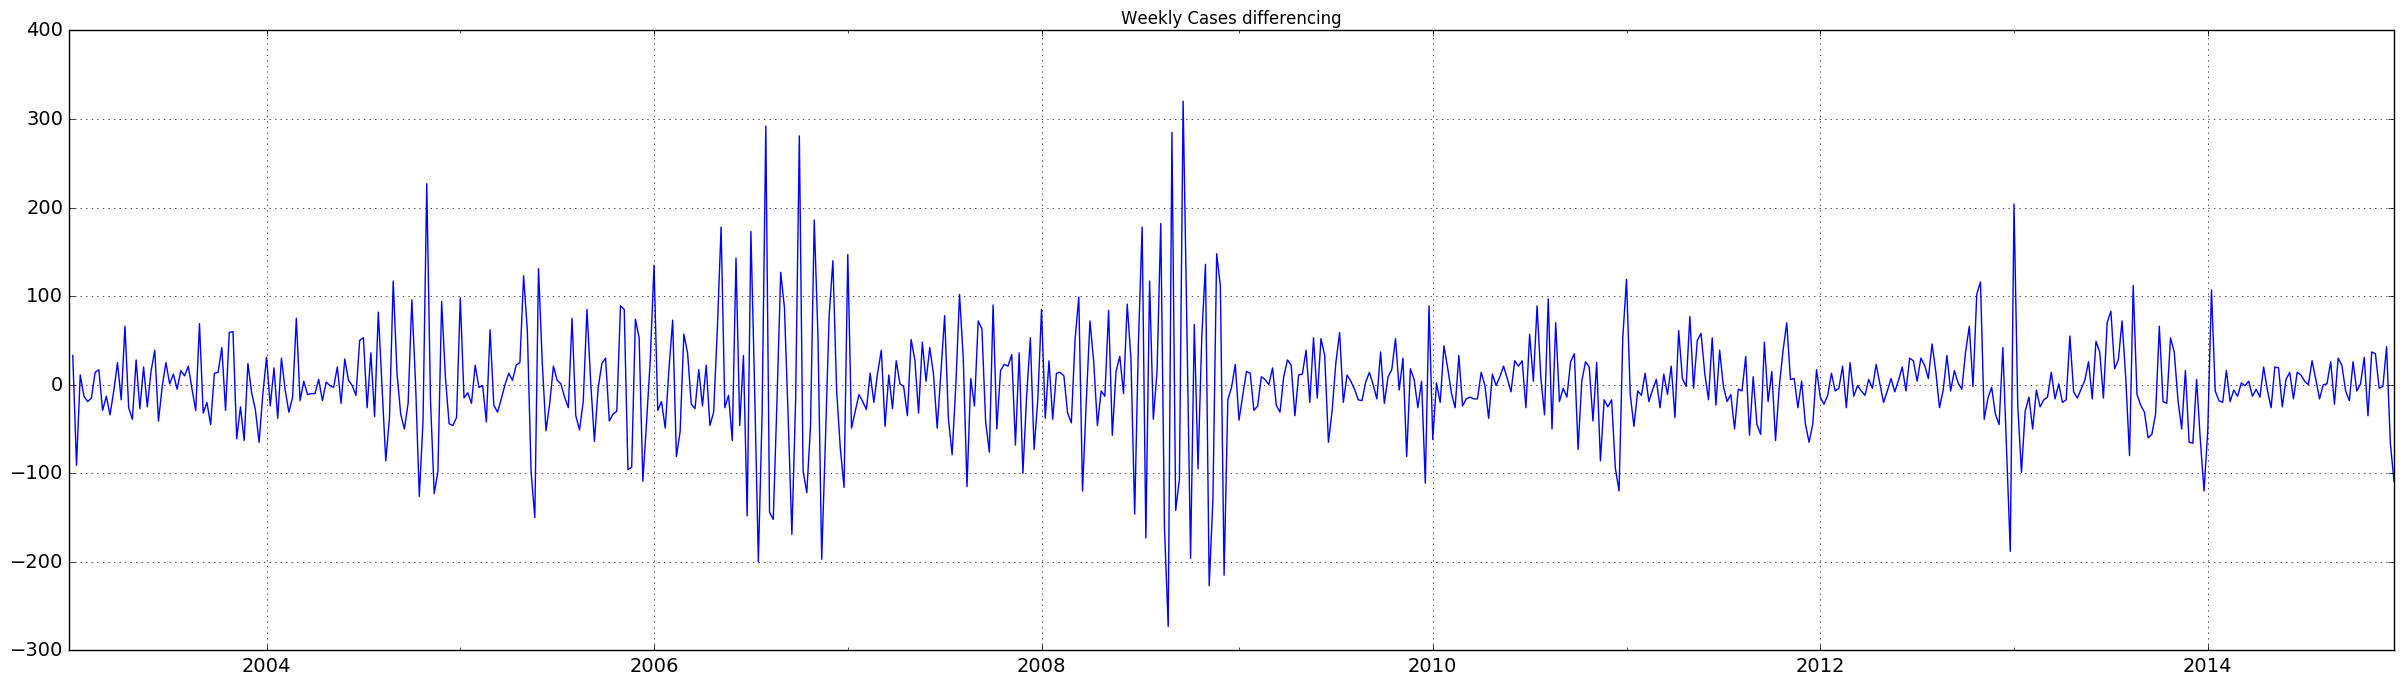

In [36]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.plot(figsize=(30,8), title= 'Weekly Cases differencing', fontsize=14)

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


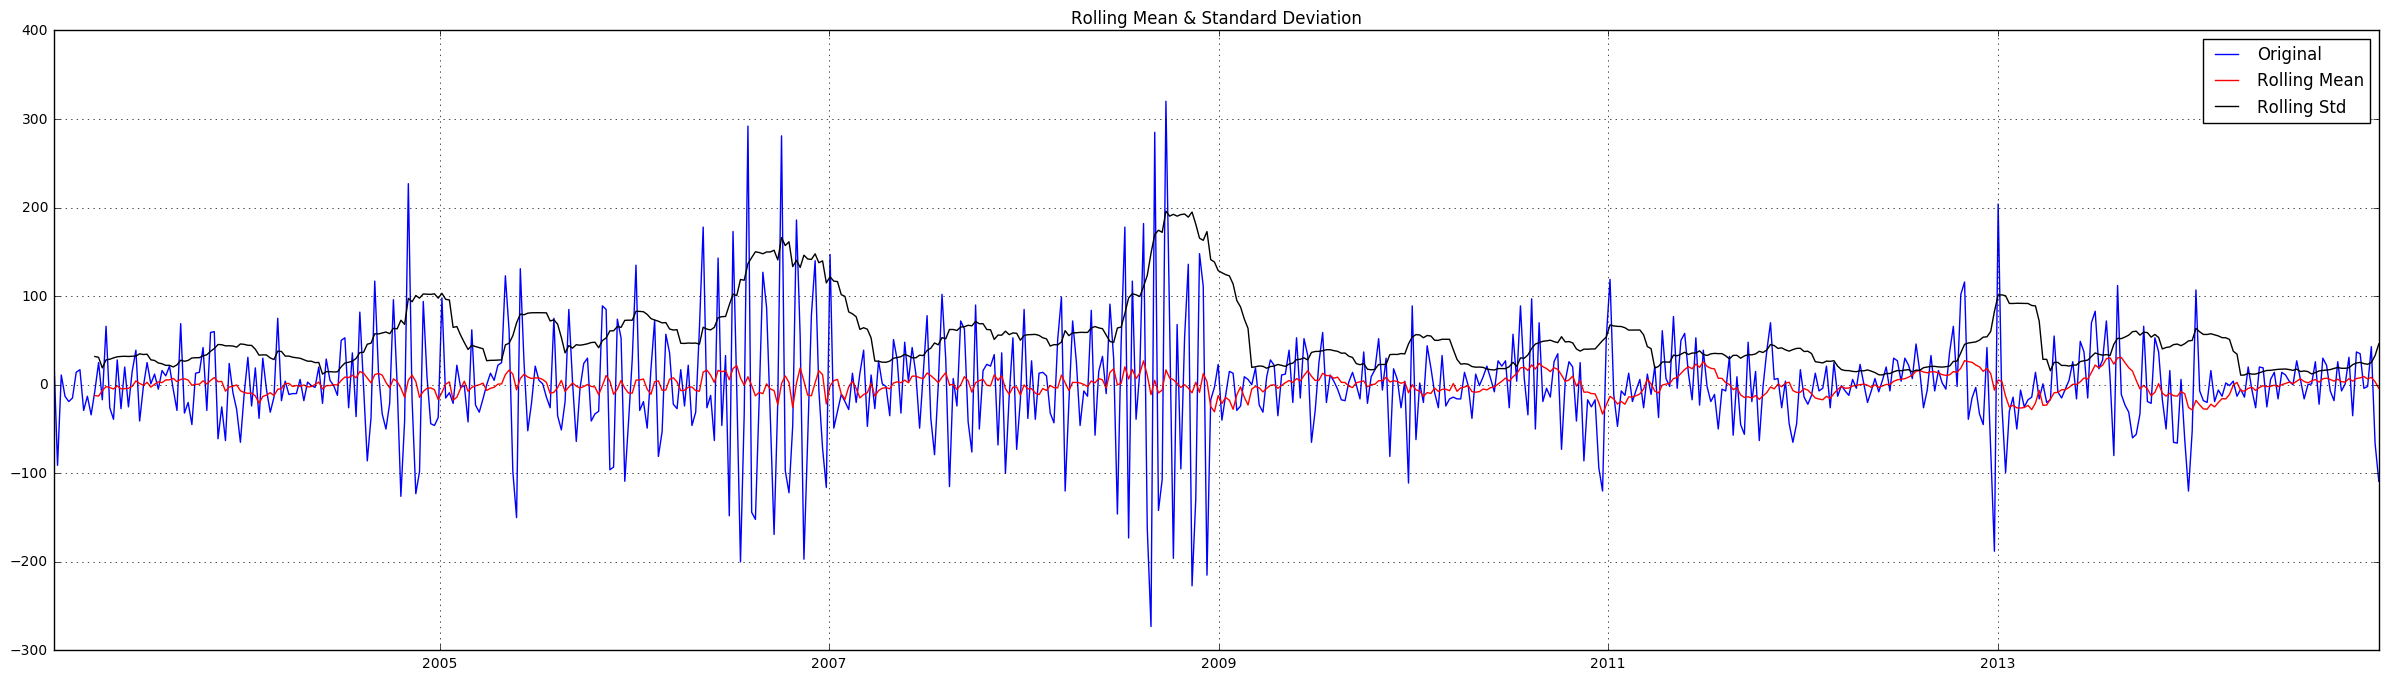

Results of Dickey-Fuller Test:
Test Statistic                -7.879178e+00
p-value                        4.753469e-12
#Lags Used                     8.000000e+00
Number of Observations Used    6.150000e+02
Critical Value (5%)           -2.866251e+00
Critical Value (1%)           -3.441028e+00
Critical Value (10%)          -2.569279e+00
dtype: float64


In [37]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

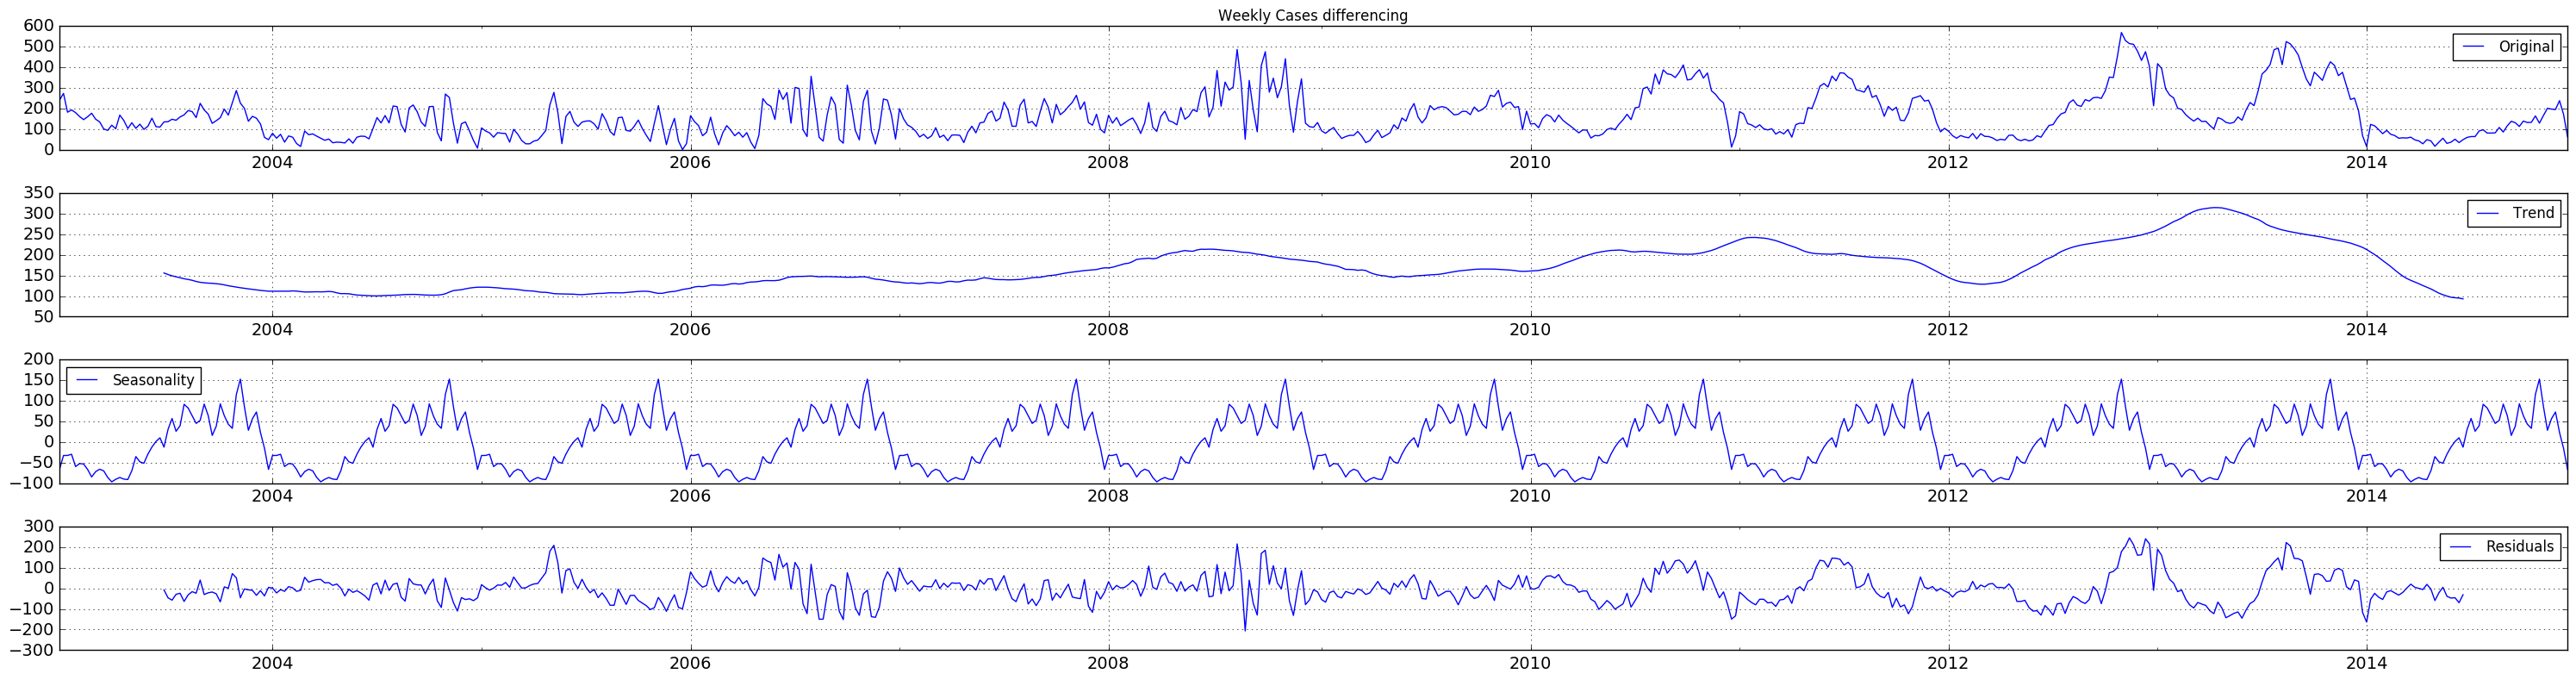

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
ts_log.plot(figsize=(30,8), title= 'Weekly Cases differencing', fontsize=14, label='Original')
plt.legend(loc='best')
plt.subplot(412)
trend.plot(figsize=(30,8), fontsize=14, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(figsize=(30,8), fontsize=14, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(figsize=(30,8), fontsize=14, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


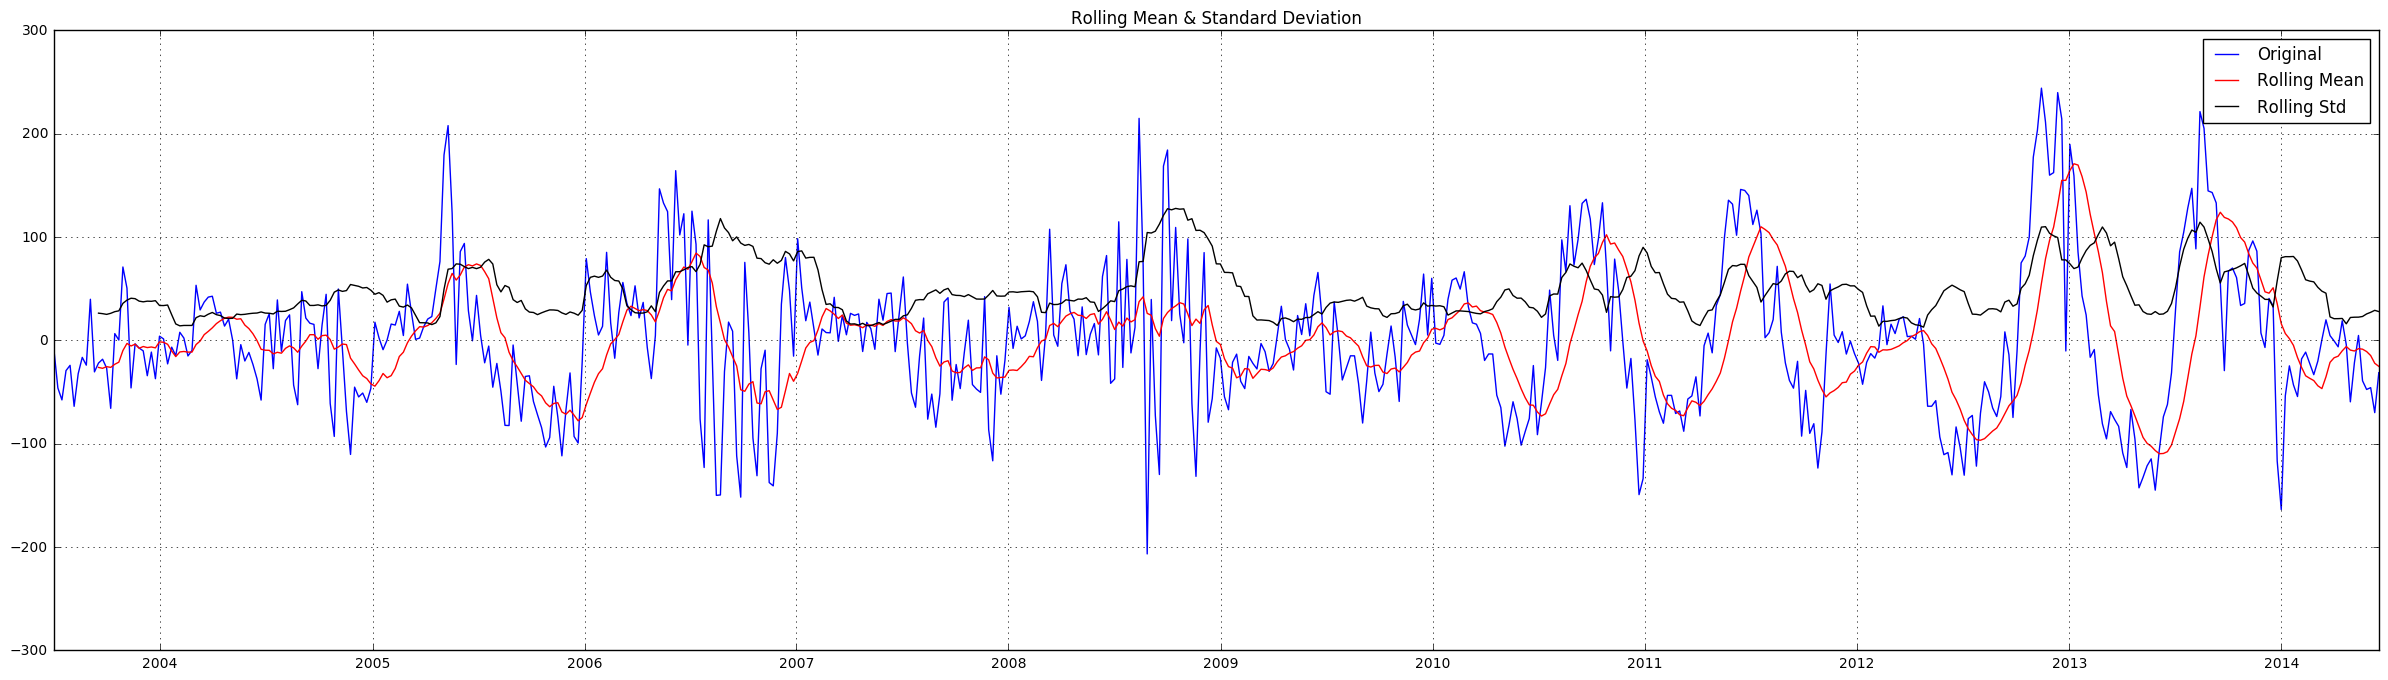

Results of Dickey-Fuller Test:
Test Statistic                -8.280132e+00
p-value                        4.543214e-13
#Lags Used                     1.900000e+01
Number of Observations Used    5.530000e+02
Critical Value (5%)           -2.866781e+00
Critical Value (1%)           -3.442230e+00
Critical Value (10%)          -2.569561e+00
dtype: float64


In [39]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [40]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [41]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

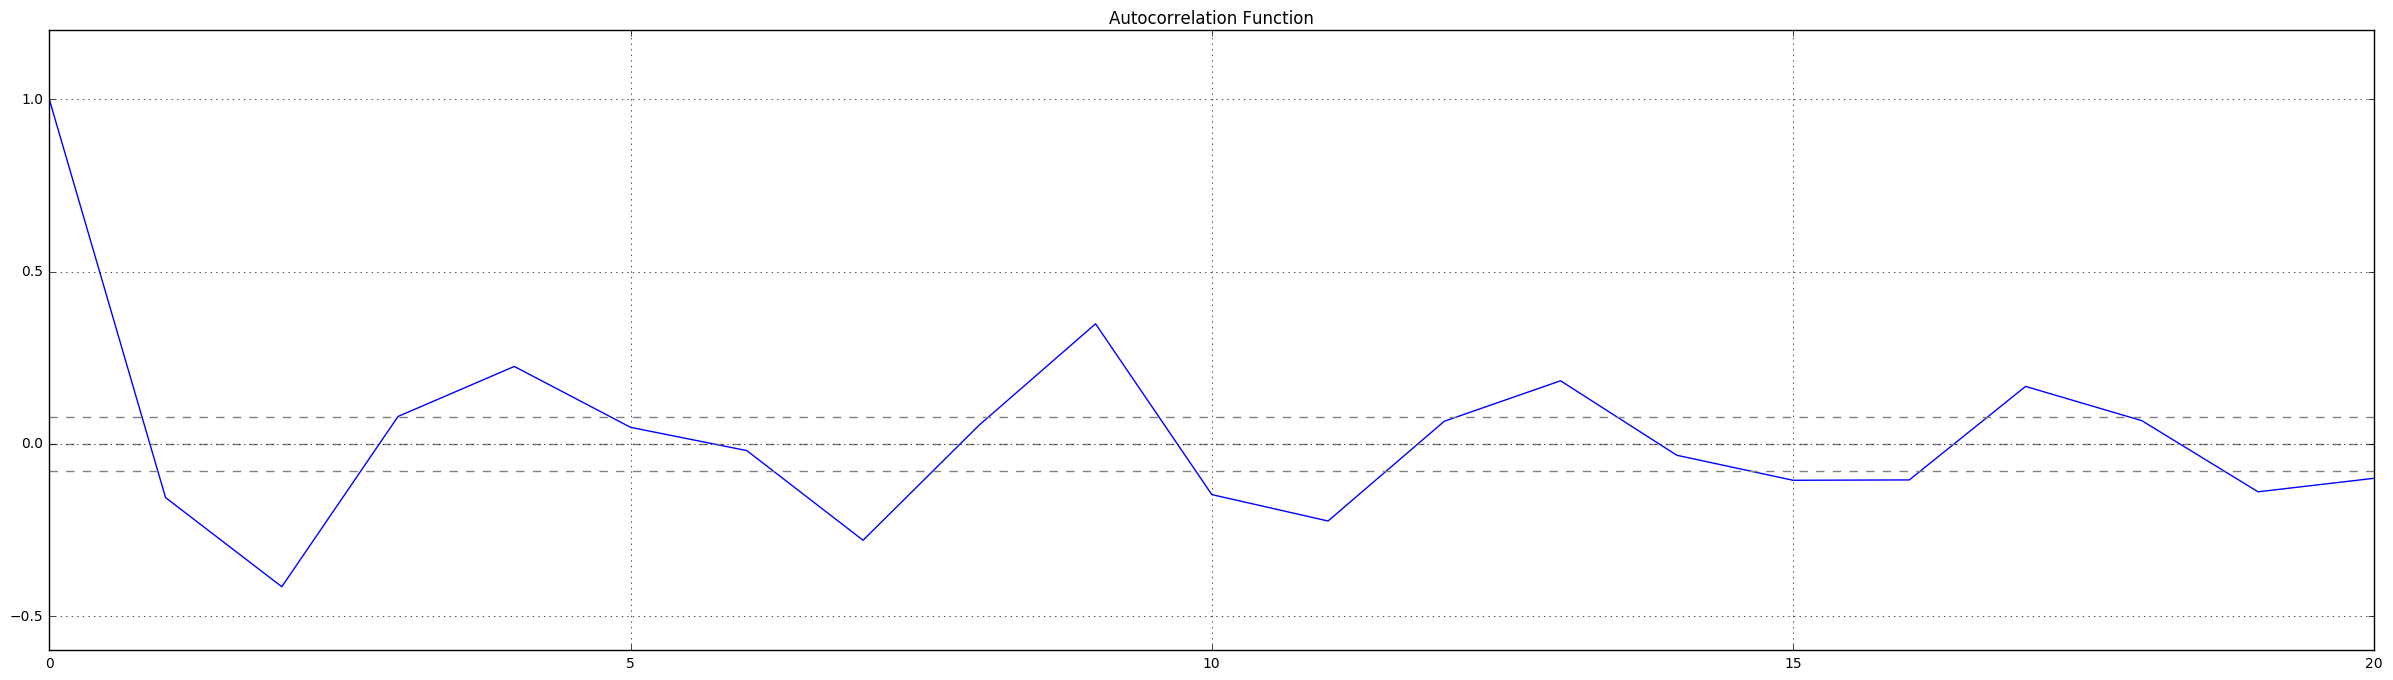

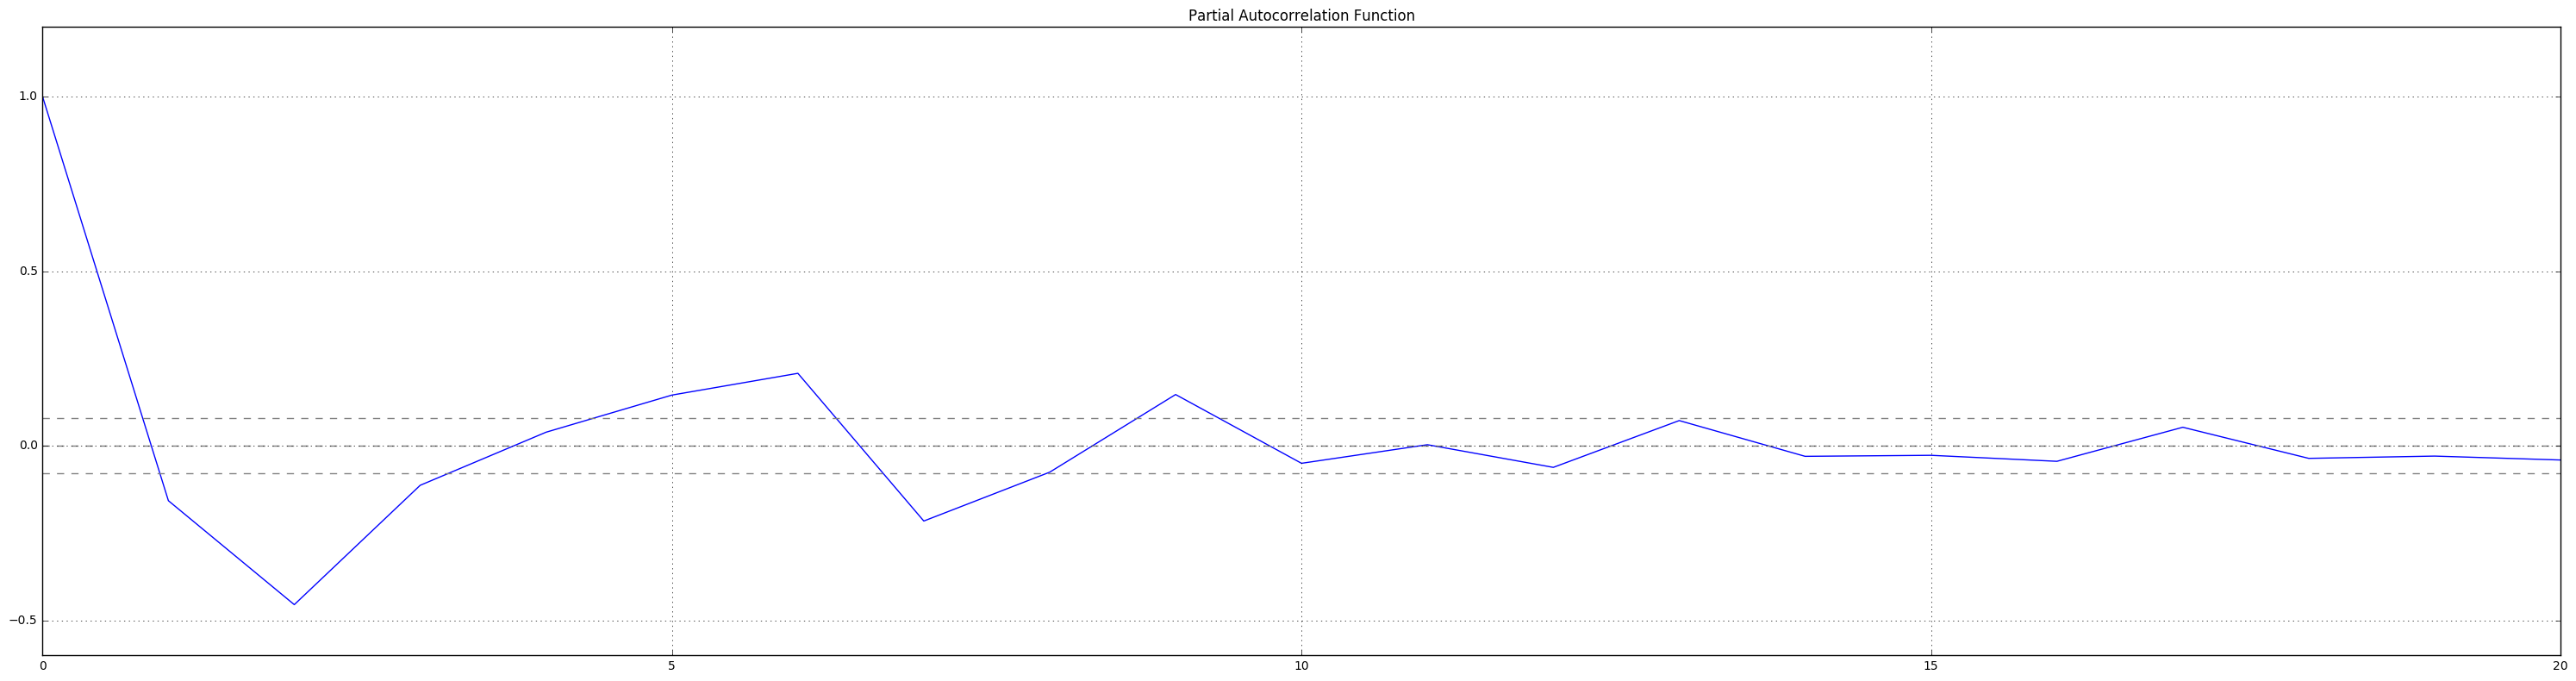

In [42]:
#Plot ACF: 
plt.figure(figsize=(30,8))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.figure(figsize=(30,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [51]:
allTemps[0]

array([u'\tChiang Rai*\t', 303201, 2001, 1, 1, 29.5, 13.0, 0.0, 76.0, 21.2], dtype=object)

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [48]:
# model = ARIMA(ts_log, order=(2, 1, 0))  
# results_AR = model.fit(disp=-1)
# plt.figure(figsize=(30,8))
# plt.plot(ts_log_diff)
# plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(30,8))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=(30,8))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(30,8))
plt.plot(BKKdf.freq)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-BKKdf.freq)**2)/len(BKKdf.freq)))

array([[u'\tChiang Rai*\t', 303201, 2001, ..., 0.0, 76.0, 21.2],
       [u'\tChiang Rai*\t', 303201, 2001, ..., 0.0, 75.0, 21.1],
       [u'\tChiang Rai*\t', 303201, 2001, ..., 0.0, 74.0, 21.4],
       ..., 
       [u'\tSatun*\t', 570201, 2012, ..., 0.2, 75.0, 28.1],
       [u'\tSatun*\t', 570201, 2012, ..., 11.8, 84.0, 27.3],
       [u'\tSatun*\t', 570201, 2012, ..., 4.3, 87.0, 26.2]], dtype=object)